# The social aspect of  cryptocurrencies
This will analyze different cryptocurrencies in order to get insight into ROI, country of origin, and number of exchanges listed


### How does exchange listing affect the price of a coin?
#### Will coins listed in more exchanges have a higher appreciation in price?


### From the top 100 coins, how many coins have appreciated double digits? triple? quadruple?

### Does country of origin affect price of coin?


### What is the relationship between market cap and percentage gains in the last 3 years?

### How does reddit subscribers, twitter followers, and alexa rank affects price?

In [4]:
%matplotlib notebook

In [5]:
#import dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from matplotlib import pyplot as plt

In [9]:
# Find an API that has information on coin
base_url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=300&page=1&sparkline=false"
print(base_url)
response_json = requests.get(base_url).json()


https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=300&page=1&sparkline=false


In [10]:
# Checkout the response

response_json

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 55615,
  'market_cap': 1039983884154,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 1168659593950,
  'total_volume': 56515386160,
  'high_24h': 57270,
  'low_24h': 54559,
  'price_change_24h': -960.43287096,
  'price_change_percentage_24h': -1.6976,
  'market_cap_change_24h': -19099231539.948853,
  'market_cap_change_percentage_24h': -1.80337,
  'circulating_supply': 18687787.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 64805,
  'ath_change_percentage': -14.20631,
  'ath_date': '2021-04-14T11:54:46.763Z',
  'atl': 67.81,
  'atl_change_percentage': 81892.59579,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2021-04-21T19:52:03.559Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereu

In [11]:
## How does exchange listing affect the price of a coin?
# 1.  Get price change of coins in last 5 years
# 1.  Get numbers of exchange that coin is listed on

In [12]:
# create empty list to hold cryptocurrencies
crypto_currencies = []

In [13]:
crypto_currencies.append(response_json)

In [14]:
crypto_currencies[0]

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 55615,
  'market_cap': 1039983884154,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 1168659593950,
  'total_volume': 56515386160,
  'high_24h': 57270,
  'low_24h': 54559,
  'price_change_24h': -960.43287096,
  'price_change_percentage_24h': -1.6976,
  'market_cap_change_24h': -19099231539.948853,
  'market_cap_change_percentage_24h': -1.80337,
  'circulating_supply': 18687787.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 64805,
  'ath_change_percentage': -14.20631,
  'ath_date': '2021-04-14T11:54:46.763Z',
  'atl': 67.81,
  'atl_change_percentage': 81892.59579,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2021-04-21T19:52:03.559Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereu

In [16]:
# make main data frame to work on
crypto_df = pd.DataFrame(crypto_currencies[0])
crypto_df = crypto_df[['id', 'symbol', 'current_price','market_cap', 'market_cap_rank', 'ath', 'ath_change_percentage', 'ath_date','atl', 'atl_change_percentage', 'atl_date']]
crypto_df['market_cap'] = crypto_df['market_cap']/1000000000

# Rename columns to see easier
crypto_df.rename(columns={'market_cap':'market_cap_billion(2021)',
                          'current_price' : 'price_04-22-21'
                          
                         }, inplace=True)
crypto_df.head()

,id,symbol,price_04-22-21,market_cap_billion(2021),market_cap_rank,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date
0,bitcoin,btc,55615.000000,1039.983884,1,64805.00,-14.20631,2021-04-14T11:54:46.763Z,67.810000,8.189260e+04,2013-07-06T00:00:00.000Z
1,ethereum,eth,2433.530000,281.401055,2,2544.30,-4.03864,2021-04-16T01:00:14.650Z,0.432979,5.637958e+05,2015-10-20T00:00:00.000Z
2,binancecoin,bnb,576.480000,89.131834,3,610.06,-5.59386,2021-04-12T09:32:32.635Z,0.039818,1.446316e+06,2017-10-19T00:00:00.000Z
3,ripple,xrp,1.370000,63.282595,4,3.40,-59.52217,2018-01-07T00:00:00.000Z,0.002686,5.111046e+04,2014-05-22T00:00:00.000Z
4,tether,usdt,0.999892,49.196503,5,1.32,-24.42784,2018-07-24T00:00:00.000Z,0.572521,7.464718e+01,2015-03-02T00:00:00.000Z


In [41]:
# Get each coin's price on 01-04-2018 to now
# Make empty list to hold the value of coins

#coin_data_2017 = []

target_date = "01-04-2018"
# Make for loop to perform multiple request getting data utilizing the existing data frame as guide
def obtain_metrics (target_list = coin_data_2017, date='01-04-2018'):
    for index, row in crypto_df.iterrows():
        target_coin = row['id']
        print(f"Processing {target_coin}")


        try:
            # build url
            price_url = f"https://api.coingecko.com/api/v3/coins/{target_coin}/history?date={date}localization=False"
            print(price_url)
            # save json respons
            response_json = requests.get(price_url).json()
            # traverse json getting specific data
            coin_id = response_json['id']
            coin_price = response_json['market_data']['current_price']['usd']
            coin_reddit_subscribers = response_json['community_data']['reddit_subscribers']
            coin_twitter_followers = response_json['community_data']['twitter_followers']
            coin_alexa_rank = response_json['public_interest_stats']['alexa_rank']
            # Add data to empty list in dictionary style
            target_list.append({
                "id" : coin_id,
                f"price {target_date}" : coin_price,
                f"reddit_subscribers {target_date}" : coin_reddit_subscribers,
                f"twitter_followers {target_date}" : coin_twitter_followers,
                f"alexa_rank {target_date}" : coin_alexa_rank
                   })
        except :
            print("coin information not found... skipping")
    print("Data Retrieval finished")
    print(f"We found a total of {len(target_list)} entries")
    
 

In [36]:
_2017_df =  pd.DataFrame(coin_data_2017)
_2017_df.dropna(inplace=True)
len(_2017_df)

70

In [37]:
_2017_df.head()

,id,price 01-04-2018,reddit_subscribers 01-04-2018,twitter_followers 01-04-2018,alexa_rank 01-04-2018
0,bitcoin,6975.275314,785619.0,819312,5574.0
1,ethereum,395.796381,348116.0,382159,8204.0
2,binancecoin,11.115511,40605.0,176,230.0
3,ripple,0.511990,184063.0,843082,5224.0
5,dogecoin,0.002799,115819.0,208970,31077.0


In [32]:
def social_metrics_plot(data_frame = _2017_df, x_values,y_column, color='b'):
    # Define size of figure
    plt.figure(figsize = (10,5))
    # arrange x_axis values based in the lenght of the Data Frame
    x_axis = np.arange(len(data_frame))
    # Use a list comprehension to adjust x ticks location if needed
    tick_locations = [value for value in x_axis]
    # define y values
    y_values = data_frame[f"{y_column}"]
    # plot x and y values, 
    plt.bar(x_axis, y_values, alpha=0.5, color=f'{color}')
    # place x ticks a
    plt.xticks(tick_locations, data_frame[f"{x_values}"], rotation='vertical', size=7)
    plt.xlabel("Cryptocurrency")
    plt.ylabel(f"{y_column}")
    plt.title(f"{y_column} for top 70 Cryptocurrencies")
    plt.annotate("@johannvillalvir", [50, 700000])
    plt.tight_layout()
    plt.show()



<IPython.core.display.Javascript object>


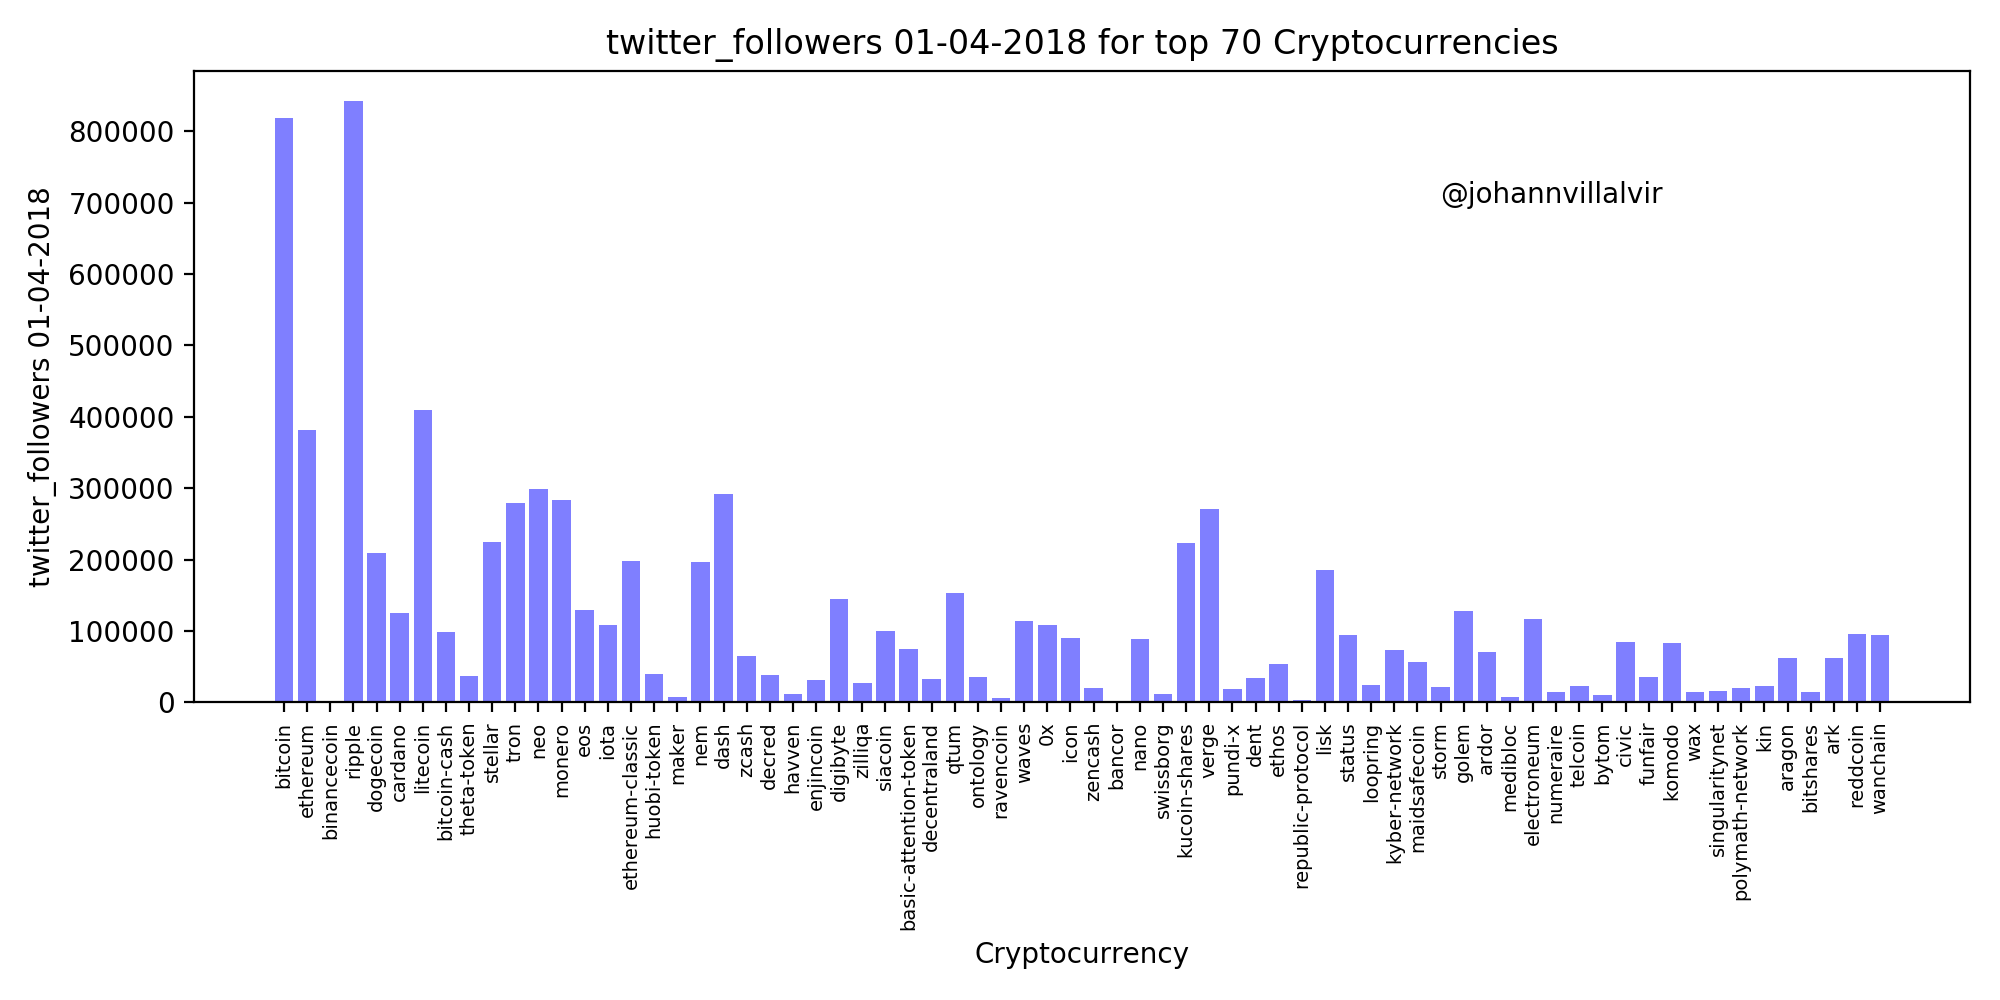

<IPython.core.display.Javascript object>


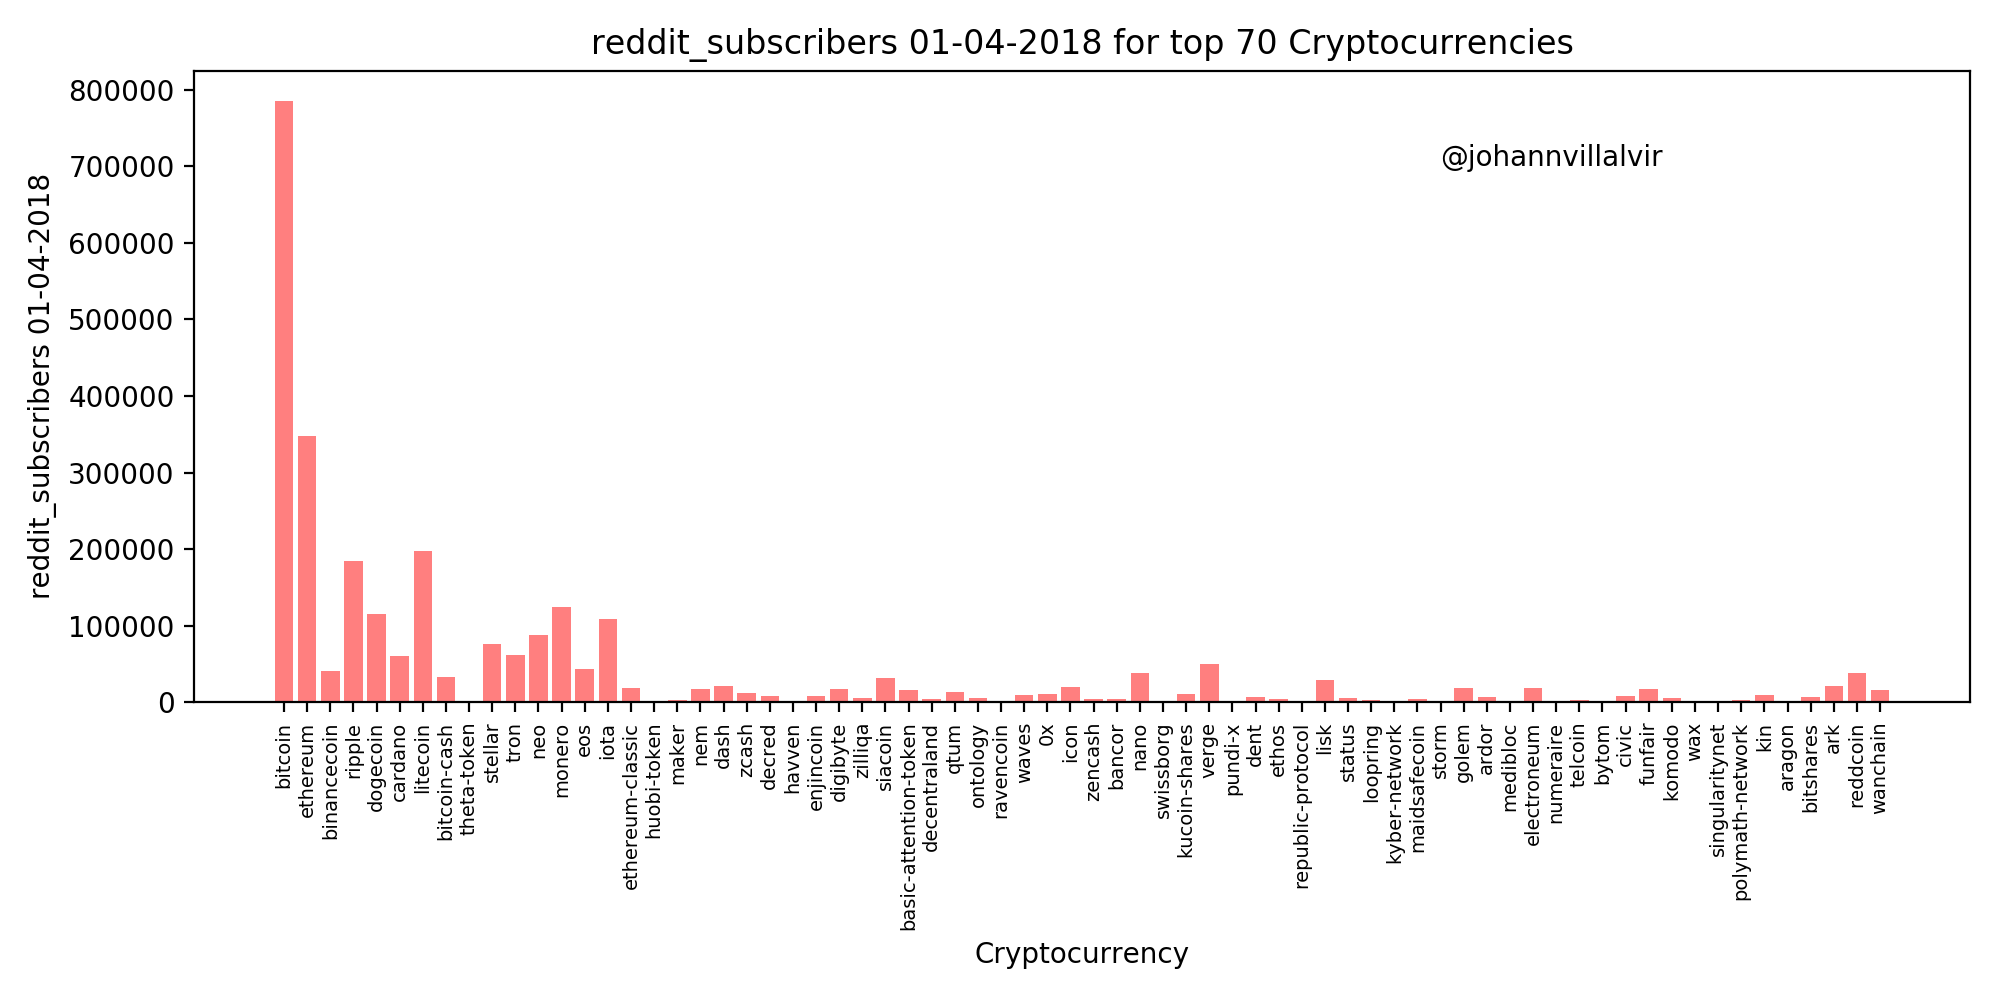

<IPython.core.display.Javascript object>


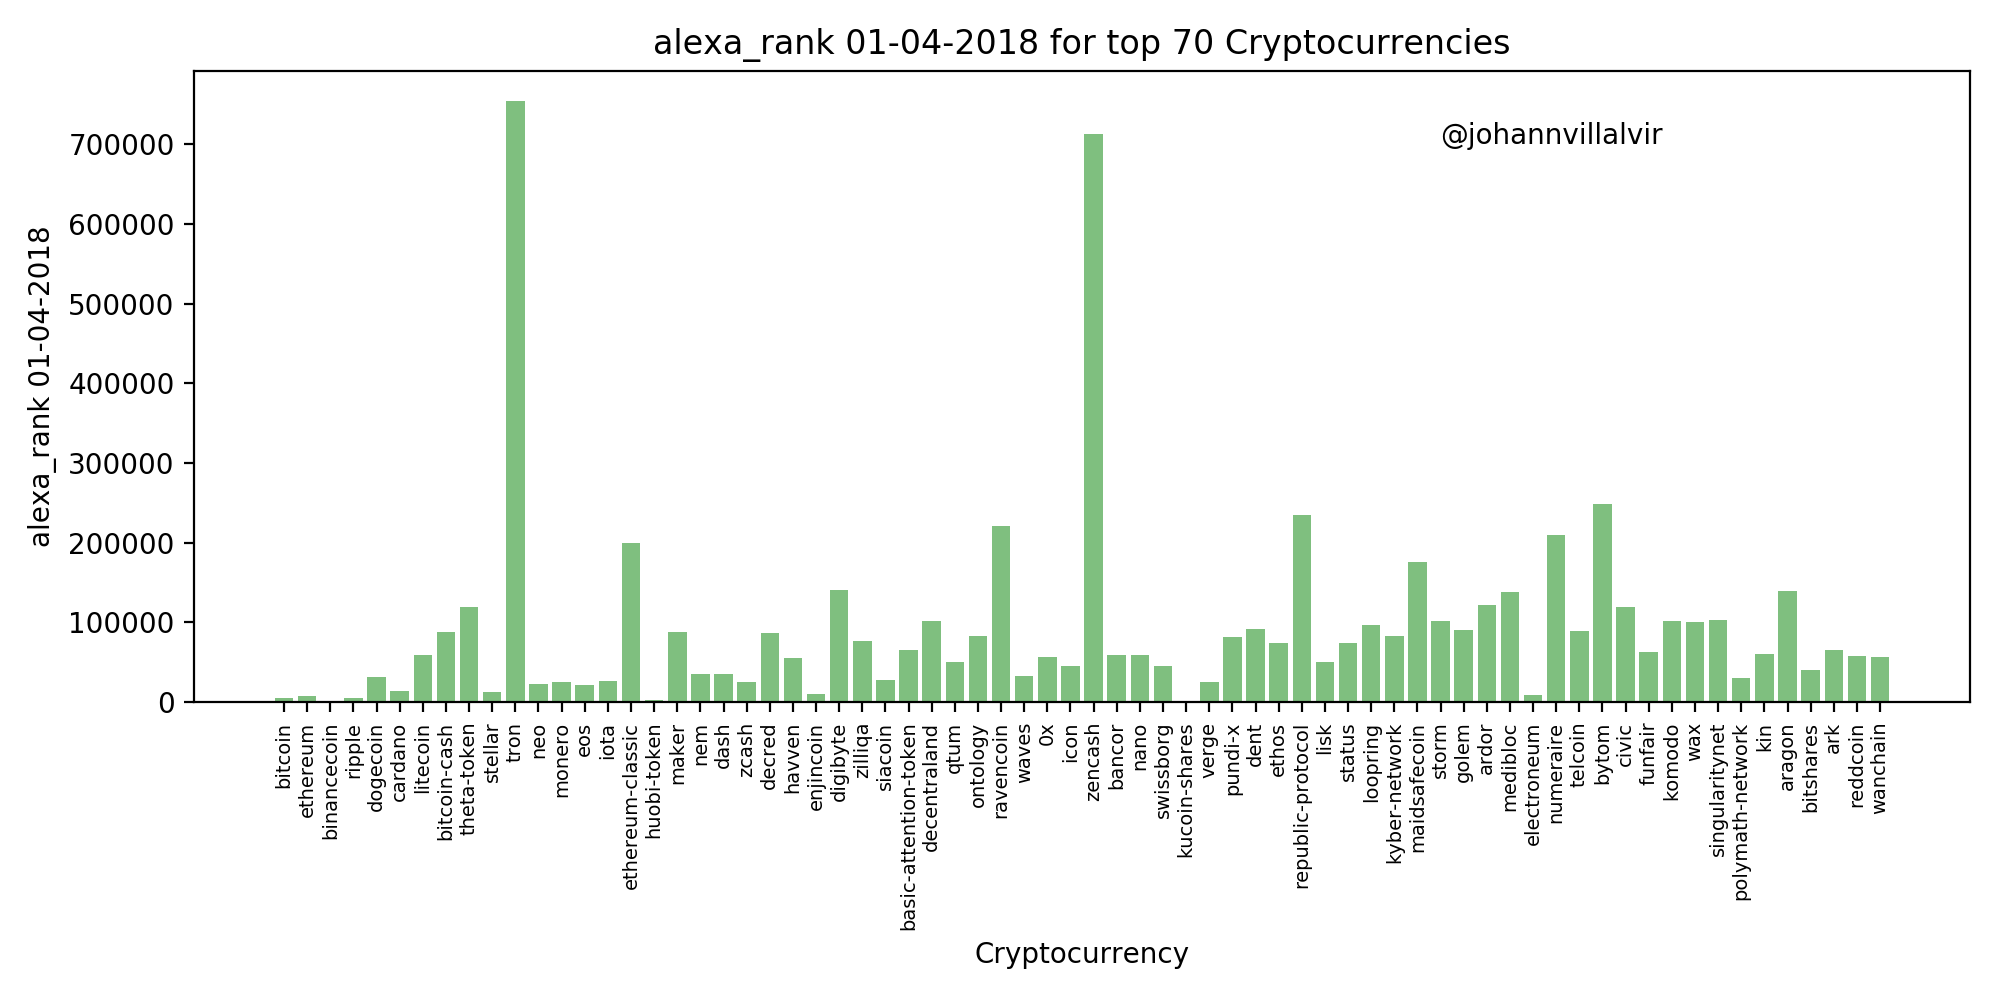

In [33]:
# What is the relationship between social media activity and market cap?
# Make a graph for twitter followers
def make_plots_save_figs():
    twitter_metrics = social_metrics_plot('id', 'twitter_followers 01-04-2018')
    # Save the image
    plt.savefig("crypto_twitter.png")
    # Make graph for reddit users
    reddit_metrics = social_metrics_plot('id', 'reddit_subscribers 01-04-2018', 'red')
    # Save the image
    plt.savefig("crypto_reddit.png")
    alexa_metrics = social_metrics_plot('id', 'alexa_rank 01-04-2018', 'green')
    # Save the image
    plt.savefig("crypto_alexa_rank.png")

In [42]:
# Make empty list for 2021
coin_data_2021 = []
obtain_metrics(coin_data_2021, '01-04-2021')

Processing bitcoin
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=01-04-2021localization=False
Processing ethereum
https://api.coingecko.com/api/v3/coins/ethereum/history?date=01-04-2021localization=False
Processing binancecoin
https://api.coingecko.com/api/v3/coins/binancecoin/history?date=01-04-2021localization=False
Processing ripple
https://api.coingecko.com/api/v3/coins/ripple/history?date=01-04-2021localization=False
Processing tether
https://api.coingecko.com/api/v3/coins/tether/history?date=01-04-2021localization=False
Processing dogecoin
https://api.coingecko.com/api/v3/coins/dogecoin/history?date=01-04-2021localization=False
Processing cardano
https://api.coingecko.com/api/v3/coins/cardano/history?date=01-04-2021localization=False
Processing polkadot
https://api.coingecko.com/api/v3/coins/polkadot/history?date=01-04-2021localization=False
Processing litecoin
https://api.coingecko.com/api/v3/coins/litecoin/history?date=01-04-2021localization=False
Processing unisw

coin information not found... skipping
Processing yearn-finance
https://api.coingecko.com/api/v3/coins/yearn-finance/history?date=01-04-2021localization=False
Processing qtum
https://api.coingecko.com/api/v3/coins/qtum/history?date=01-04-2021localization=False
Processing ontology
https://api.coingecko.com/api/v3/coins/ontology/history?date=01-04-2021localization=False
Processing bitcoin-gold
https://api.coingecko.com/api/v3/coins/bitcoin-gold/history?date=01-04-2021localization=False
Processing uma
https://api.coingecko.com/api/v3/coins/uma/history?date=01-04-2021localization=False
Processing ravencoin
https://api.coingecko.com/api/v3/coins/ravencoin/history?date=01-04-2021localization=False
Processing waves
https://api.coingecko.com/api/v3/coins/waves/history?date=01-04-2021localization=False
Processing huobi-btc
https://api.coingecko.com/api/v3/coins/huobi-btc/history?date=01-04-2021localization=False
Processing 0x
https://api.coingecko.com/api/v3/coins/0x/history?date=01-04-2021loca

coin information not found... skipping
Processing compound-usdt
https://api.coingecko.com/api/v3/coins/compound-usdt/history?date=01-04-2021localization=False
coin information not found... skipping
Processing nkn
https://api.coingecko.com/api/v3/coins/nkn/history?date=01-04-2021localization=False
coin information not found... skipping
Processing mirror-protocol
https://api.coingecko.com/api/v3/coins/mirror-protocol/history?date=01-04-2021localization=False
coin information not found... skipping
Processing quant-network
https://api.coingecko.com/api/v3/coins/quant-network/history?date=01-04-2021localization=False
coin information not found... skipping
Processing maidsafecoin
https://api.coingecko.com/api/v3/coins/maidsafecoin/history?date=01-04-2021localization=False
coin information not found... skipping
Processing btc-standard-hashrate-token
https://api.coingecko.com/api/v3/coins/btc-standard-hashrate-token/history?date=01-04-2021localization=False
coin information not found... skippi

coin information not found... skipping
Processing akash-network
https://api.coingecko.com/api/v3/coins/akash-network/history?date=01-04-2021localization=False
coin information not found... skipping
Processing seth
https://api.coingecko.com/api/v3/coins/seth/history?date=01-04-2021localization=False
coin information not found... skipping
Processing kava
https://api.coingecko.com/api/v3/coins/kava/history?date=01-04-2021localization=False
coin information not found... skipping
Processing alchemix
https://api.coingecko.com/api/v3/coins/alchemix/history?date=01-04-2021localization=False
coin information not found... skipping
Processing unibright
https://api.coingecko.com/api/v3/coins/unibright/history?date=01-04-2021localization=False
coin information not found... skipping
Processing rocket-pool
https://api.coingecko.com/api/v3/coins/rocket-pool/history?date=01-04-2021localization=False
coin information not found... skipping
Processing zipmex-token
https://api.coingecko.com/api/v3/coins/zi

coin information not found... skipping
Processing aelf
https://api.coingecko.com/api/v3/coins/aelf/history?date=01-04-2021localization=False
coin information not found... skipping
Data Retrieval finished
We found a total of 92 entries


In [45]:
coin_data_2021

{'id': 'bitcoin',
 'price 01-04-2018': 58817.3738884188,
 'reddit_subscribers 01-04-2018': 2648989,
 'twitter_followers 01-04-2018': 83714,
 'alexa_rank 01-04-2018': 5018}

In [47]:
_2021_df = pd.DataFrame(coin_data_2021)

In [48]:
_2021_df.head()

,id,price 01-04-2018,reddit_subscribers 01-04-2018,twitter_followers 01-04-2018,alexa_rank 01-04-2018
0,bitcoin,58817.373888,2648989.0,83714.0,5018.0
1,ethereum,1915.832536,753614.0,852223.0,6152.0
2,binancecoin,302.745193,215806.0,NaN,154.0
3,ripple,0.573818,278986.0,1310270.0,11412.0
4,tether,1.000288,NaN,80505.0,38477.0


In [ ]:
twitter_21_metrics = 